# Model Building on State California Data

In [1]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, mean_squared_error
from sklearn import linear_model, metrics 
from sklearn.metrics import r2_score 
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Reading dataset and storing it in a dataframe
dataset = pd.read_csv('C:/Users/Akshay/USAccidentCA.csv')

In [3]:
# To get the info of the training dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676011 entries, 0 to 676010
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               676011 non-null  int64  
 1   Start_Time             676011 non-null  int64  
 2   Start_Lat              676011 non-null  float64
 3   Start_Lng              676011 non-null  float64
 4   Street                 676011 non-null  int64  
 5   Side                   676011 non-null  int64  
 6   City                   676011 non-null  int64  
 7   County                 676011 non-null  int64  
 8   State                  676011 non-null  int64  
 9   Zipcode                676011 non-null  int64  
 10  Airport_Code           676011 non-null  int64  
 11  Temperature(F)         676011 non-null  float64
 12  Humidity(%)            676011 non-null  float64
 13  Pressure(in)           676011 non-null  float64
 14  Wind_Direction         676011 non-nu

In [4]:
dataset.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Airport_Code', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Crossing', 'Junction', 'Railway',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [5]:
dataset.shape

(676011, 28)

In [6]:
dataset.describe()

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,676011.000000,6.760110e+05,676011.000000,676011.000000,676011.000000,676011.000000,676011.000000,676011.000000,676011.0,676011.000000,...,676011.000000,676011.000000,676011.000000,676011.000000,676011.000000,676011.000000,676011.000000,676011.000000,676011.000000,676011.000000
mean,2.269565,1.438990e+06,35.609115,-119.559028,80691.949909,1.894447,6343.605492,1024.805743,3.0,334531.888219,...,0.033029,0.136805,0.010748,0.019014,0.017933,0.081451,0.296614,0.255475,0.207040,0.167466
std,0.482747,8.995333e+05,2.056055,1.965402,37340.344767,0.307270,3088.320157,396.747248,0.0,11532.075607,...,0.178713,0.343642,0.103116,0.136576,0.132709,0.273527,0.456765,0.436128,0.405184,0.373392
min,1.000000,1.537000e+03,32.542587,-124.369232,1.000000,0.000000,14.000000,11.000000,3.0,315200.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.297925e+05,33.955063,-121.736855,48664.000000,2.000000,3735.000000,901.000000,3.0,324913.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.555114e+06,34.221260,-118.449440,84668.000000,2.000000,6716.000000,1135.000000,3.0,332344.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.277964e+06,37.719055,-117.928963,96305.500000,2.000000,9040.000000,1349.000000,3.0,343584.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,4.000000,2.771755e+06,42.005420,-114.300598,163440.000000,2.000000,11477.000000,1702.000000,3.0,359052.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
cols =['State']
print("Unique count of categorical features:")
for i in cols:
  print(i,dataset[i].unique().size)

Unique count of categorical features:
State 1


In [8]:
# Droppig Categorical Features
dataset = dataset.drop(['State'], axis=1)

In [9]:
dataset.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'Street', 'Side',
       'City', 'County', 'Zipcode', 'Airport_Code', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Crossing', 'Junction', 'Railway',
       'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [10]:
# Initializing the Matrix of Features Independent Variable (X) and the Dependent Variable (y)
X = dataset.drop(['Severity'], axis=1)
y = dataset['Severity']

In [11]:
X.head()

,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,Zipcode,Airport_Code,Temperature(F),...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,42057,38.085300,-122.233017,95722,2,10524,1422,343380,161,75.0,...,0,0,0,0,0,0,0,0,0,0
1,42046,37.631813,-122.084167,85156,2,4402,11,341769,927,75.0,...,0,0,0,0,0,0,0,0,0,0
2,42087,37.896564,-122.070717,85044,2,10742,352,343420,359,82.9,...,0,0,0,0,0,0,0,0,0,0
3,42071,37.334255,-122.032471,104188,2,2376,1365,345188,1356,75.9,...,0,0,0,0,0,0,0,0,0,0
4,42033,37.250729,-121.910713,112450,2,9053,1365,346495,1585,75.2,...,0,0,0,0,0,0,0,0,0,0


In [12]:
y.head()

0    3
1    3
2    2
3    3
4    2
Name: Severity, dtype: int64

In [13]:
# Spliting Data into Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
# Feature Scaling - Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train)

[[-1.54850703 -0.82381699  0.6484578  ... -0.58540156 -0.51072425
  -0.44811631]
 [ 1.13391914  1.15340823 -0.39368774 ... -0.58540156 -0.51072425
  -0.44811631]
 [ 0.77370998  0.83158747 -1.20175365 ... -0.58540156 -0.51072425
  -0.44811631]
 ...
 [ 1.19449524 -0.70702322  0.46052159 ... -0.58540156 -0.51072425
  -0.44811631]
 [ 1.28881637 -0.73857938  0.79515829 ...  1.70822914  1.95800377
   2.23156351]
 [-0.9921182   1.41931409 -0.92241334 ... -0.58540156 -0.51072425
  -0.44811631]]


In [16]:
print(X_test)

[[ 0.97536767 -0.59794826  0.54109221 ...  1.70822914  1.95800377
   2.23156351]
 [ 0.93816513 -0.76368082  0.56917694 ... -0.58540156 -0.51072425
  -0.44811631]
 [-1.53523375 -1.43721654  1.26618198 ... -0.58540156 -0.51072425
  -0.44811631]
 ...
 [-1.12997788 -0.7239939   0.8607514  ... -0.58540156 -0.51072425
  -0.44811631]
 [ 0.82066049  1.4371651  -1.06284718 ... -0.58540156 -0.51072425
  -0.44811631]
 [-0.7998195  -0.70657089  0.59750589 ...  1.70822914  1.95800377
   2.23156351]]


# Logistic Regression Classifier

In [17]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 1, max_iter=500)
classifier_LR.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1)

In [18]:
# Predicting the Test set results
y_pred_LR = classifier_LR.predict(X_test)
print(y_pred_LR)

[2 2 2 ... 2 2 2]


In [19]:
# Initialize an empty list for storing the Accuracy for each algorithm
accuracy_list = []
# Initialize an empty list for storing the Mean Squared Error for each algorithm
MeanSquaredError_list = []

In [20]:
# Making the Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
print('Confusion Matrix : ')
print(cm_LR)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_LR = accuracy_score(y_test, y_pred_LR)
print('Logistic Regression Classifier- Accuracy Score : ', acc_LR)
# Append to the accuracy list
accuracy_list.append(acc_LR)

Confusion Matrix : 
[[    0  1159     4     0]
 [    3 91614  6492     0]
 [    0 26803  7827     0]
 [    0  1220    81     0]]

Logistic Regression Classifier- Accuracy Score :  0.7354940348956754


In [21]:
print(classifier_LR.intercept_)
print(classifier_LR.coef_)

[-5.88168969  3.88339003  2.58401874 -0.58571908]
[[ 3.49728137e+00 -3.92999266e-01 -1.16837850e+00  5.23075239e-02
  -4.28476221e-02  1.93521032e-02  3.29892668e-02  4.48641289e-01
  -8.53689378e-02 -6.53098566e-02  7.73902984e-03  1.01951989e-01
   7.88021413e-02 -3.20672650e-02  1.04928798e-02 -4.49161606e-02
   1.76851759e-02  5.38935573e-02  1.32987325e-02 -3.98424734e-02
   7.33057074e-02  1.57965157e-01 -2.68448185e-02 -5.78556166e-02
   9.19450456e-02 -2.20159335e-02]
 [-9.64225427e-01  1.88203033e-02  2.53011242e-01  8.96006133e-02
  -1.35946196e-01 -3.44273040e-02  1.38018199e-01 -2.20761132e-02
  -5.54283839e-02 -3.31575289e-02 -7.08467978e-02 -1.04577550e-01
  -7.42079447e-02 -2.23122496e-02 -9.03755175e-03  6.46366509e-03
   1.82017683e-02 -4.96055066e-02 -1.53877404e-02  3.34956516e-02
   4.99954111e-02  5.63646796e-02 -8.99385744e-03  4.48184022e-02
  -6.26103305e-02 -9.20112276e-02]
 [-1.48315083e+00  2.66243091e-01  5.21569072e-01  2.41719142e-01
   3.93800652e-01  3.6

In [22]:
type(y_pred_LR)

numpy.ndarray

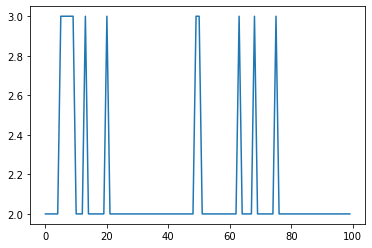

In [23]:
# Plot 100 Predicted Values
import matplotlib.pyplot as plt
plt.plot(y_pred_LR[:100])

In [24]:
type(y_test)

pandas.core.series.Series

In [25]:
y_test2 = y_test.values
type(y_test2)

numpy.ndarray

In [26]:
y_test2[:100]

array([2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 1, 2, 3, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2], dtype=int64)

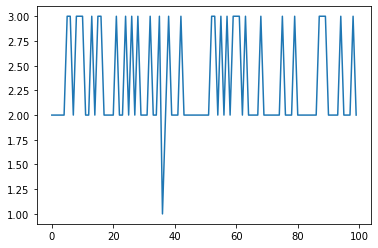

In [27]:
# Plot 100 Test Values
import matplotlib.pyplot as plt
plt.plot(y_test2[:100])

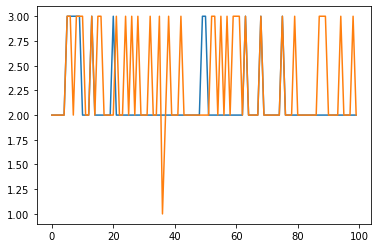

In [28]:
import matplotlib.pyplot as plt
plt.plot(y_pred_LR[:100])
plt.plot(y_test2[:100])

In [29]:
# Mean Squared Error
mse_LR = metrics.mean_squared_error(y_test, y_pred_LR)
print('Logistic Regression Classifier- Mean Squared Error:', mse_LR)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_LR)

Logistic Regression Classifier- Mean Squared Error: 0.29166512577383635


# K-Nearest Neighbors Classifier

In [30]:
# Training the K-Nearest Neighbors model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
# Predicting the Test set results
y_pred_KNN = classifier_KNN.predict(X_test)
print(y_pred_KNN)

[2 2 3 ... 3 3 2]


In [32]:
# Making the Confusion Matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print('Confusion Matrix : ')
print(cm_KNN)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_KNN = accuracy_score(y_test, y_pred_KNN)
print('K-Nearest Neighbors Classifier- Accuracy Score : ', acc_KNN)
# Append to the accuracy list
accuracy_list.append(acc_KNN)

Confusion Matrix : 
[[  366   764    27     6]
 [  478 86376 11167    88]
 [   98 15485 19020    27]
 [   11  1026   204    60]]

K-Nearest Neighbors Classifier- Accuracy Score :  0.7826897332159789


In [33]:
# Mean Squared Error
mse_KNN = metrics.mean_squared_error(y_test, y_pred_KNN)
print('K-Nearest Neighbors Classifier- Mean Squared Error:', mse_KNN)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_KNN)

K-Nearest Neighbors Classifier- Mean Squared Error: 0.24580815514448645


# Support Vector Machine Classification

In [34]:
# Training the Support Vector Machine model on the Training set
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train[:10000], y_train[:10000])

SVC(kernel='linear', random_state=0)

In [35]:
# Predicting the Test set results
y_pred_SVM = classifier_SVM.predict(X_test)
print(y_pred_SVM)

[2 2 2 ... 2 2 2]


In [36]:
# Making the Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix : ')
print(cm_SVM)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_SVM = accuracy_score(y_test, y_pred_SVM)
print('Support Vector Classifier- Accuracy Score : ', acc_SVM)
# Append to the accuracy list
accuracy_list.append(acc_SVM)

Confusion Matrix : 
[[    0  1163     0     0]
 [    0 98109     0     0]
 [    0 34630     0     0]
 [    0  1301     0     0]]

Support Vector Classifier- Accuracy Score :  0.7256421824959506


In [37]:
# Mean Squared Error
mse_SVM = metrics.mean_squared_error(y_test, y_pred_SVM)
print('Support Vector Classifier- Mean Squared Error:', mse_SVM)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_SVM)

Support Vector Classifier- Mean Squared Error: 0.3032255201437838


# Naive Bayes Classification

In [38]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

GaussianNB()

In [39]:
# Predicting the Test set results
y_pred_NB = classifier_NB.predict(X_test)
# print y_pred
print(y_pred_NB)

[2 3 3 ... 3 1 3]


In [40]:
# Making the Confusion Matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
print('Confusion Matrix : ')
print(cm_NB)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_NB = accuracy_score(y_test, y_pred_NB)
print('Naive Bayes Classifier- Accuracy Score : ', acc_NB)
# Append to the accuracy list
accuracy_list.append(acc_NB)

Confusion Matrix : 
[[  683   179   296     5]
 [ 8170 29137 59745  1057]
 [  814  3066 30591   159]
 [  126   451   702    22]]

Naive Bayes Classifier- Accuracy Score :  0.44697972678121045


In [41]:
# Mean Squared Error
mse_NB = metrics.mean_squared_error(y_test, y_pred_NB)
print('Naive Bayes Classifier- Mean Squared Error:', mse_NB)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_NB)

Naive Bayes Classifier- Mean Squared Error: 0.6188620074998336


# Decision Tree Classification

In [42]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [43]:
# Predicting the Test set results
y_pred_DT = classifier_DT.predict(X_test)
print(y_pred_DT)

[2 2 3 ... 2 2 2]


In [44]:
# Making the Confusion Matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)
print('Confusion Matrix : ')
print(cm_DT)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_DT = accuracy_score(y_test, y_pred_DT)
print('Decision Tree Classifier- Accuracy Score : ', acc_DT)
# Append to the accuracy list
accuracy_list.append(acc_DT)

Confusion Matrix : 
[[  769   341    42    11]
 [  474 86837 10049   749]
 [   69  9733 24526   302]
 [   20   580   264   437]]

Decision Tree Classifier- Accuracy Score :  0.8325924720605312


In [45]:
# Mean Squared Error
mse_DT = metrics.mean_squared_error(y_test, y_pred_DT)
print('Decision Tree Classifier- Mean Squared Error:', mse_DT)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_DT)

Decision Tree Classifier- Mean Squared Error: 0.20119376049348017


# Random Forest Classification

In [46]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [47]:
# Predicting the Test set results
y_pred_RF = classifier_RF.predict(X_test)
print(y_pred_RF)

[2 2 3 ... 2 2 2]


In [48]:
# Making the Confusion Matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
print('Confusion Matrix : ')
print(cm_RF)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_RF = accuracy_score(y_test, y_pred_RF)
print('Random Forest Classifier- Accuracy Score : ', acc_RF)
# Append to the accuracy list
accuracy_list.append(acc_RF)

Confusion Matrix : 
[[  735   410    15     3]
 [  216 91220  6625    48]
 [   43 11070 23473    44]
 [    6   789   201   305]]

Random Forest Classifier- Accuracy Score :  0.8559943196526705


In [49]:
# Mean Squared Error
mse_RF = metrics.mean_squared_error(y_test, y_pred_RF)
print('Random Forest Classifier- Mean Squared Error:', mse_RF)
# Append to the MeanSquaredError list
MeanSquaredError_list.append(mse_RF)

Random Forest Classifier- Mean Squared Error: 0.16439723970621953


# Result

In [50]:
# Accuracy List of all the Models
print(accuracy_list)

[0.7354940348956754, 0.7826897332159789, 0.7256421824959506, 0.44697972678121045, 0.8325924720605312, 0.8559943196526705]
